### Exploratory Data Analysis (EDA) for AQI Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import skew, kurtosis
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

In [3]:
# Load data
df = pd.read_csv('/Users/amalshar/Desktop/USD/Fall 2025/Data Analysis/Final Project/daily_2025_engineered_data.csv')
df['Date Local'] = pd.to_datetime(df['Date Local'], errors='coerce')


In [4]:
print("Shape of dataset:", df.shape)

Shape of dataset: (91740, 32)


In [5]:
df.head()

,State Code,County Code,Site Num,Date Local,CO,SO2,NO2,O3,PM25,BarometricPressure,...,PM25_roll_3,PM25_roll_7,O3_roll_3,O3_roll_7,month,dayofweek,is_weekend,dayofyear,PM25xTemp,NO2xWind
0,6,19,11,2025-01-01,0.615870,0.442857,11.76087,0.013706,35.654167,1005.316667,...,35.618056,36.737500,0.013706,0.013706,1,2,0,1,1755.819154,16.465218
1,6,19,11,2025-01-01,0.615870,0.442857,11.76087,0.013706,39.500000,1005.316667,...,36.918056,36.737500,0.013706,0.013706,1,2,0,1,1945.210403,2293.369650
2,6,19,11,2025-01-01,0.615870,0.442857,11.76087,0.013706,39.500000,1005.316667,...,38.218056,36.737500,0.013706,0.013706,1,2,0,1,1945.210403,16.465218
3,6,19,11,2025-01-01,0.615870,0.452174,11.76087,0.013706,35.600000,1005.316667,...,38.200000,36.729762,0.013706,0.013706,1,2,0,1,1753.151655,2293.369650
4,6,19,11,2025-01-01,0.544444,0.452174,11.76087,0.013706,39.500000,1005.316667,...,38.200000,37.279167,0.013706,0.013706,1,2,0,1,1945.210403,16.465218


In [6]:
print("\nDataset Info:")
df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91740 entries, 0 to 91739
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   State Code          91740 non-null  int64         
 1   County Code         91740 non-null  int64         
 2   Site Num            91740 non-null  int64         
 3   Date Local          91740 non-null  datetime64[ns]
 4   CO                  91740 non-null  float64       
 5   SO2                 91740 non-null  float64       
 6   NO2                 91740 non-null  float64       
 7   O3                  91740 non-null  float64       
 8   PM25                91740 non-null  float64       
 9   BarometricPressure  91740 non-null  float64       
 10  Temperature         91740 non-null  float64       
 11  WindResultant       91740 non-null  float64       
 12  DailyAQI            91740 non-null  float64       
 13  AQI_lag_1           91740 non-n

In [7]:
print("\nMissing Values:")
print(df.isna().sum())


Missing Values:
State Code            0
County Code           0
Site Num              0
Date Local            0
CO                    0
SO2                   0
NO2                   0
O3                    0
PM25                  0
BarometricPressure    0
Temperature           0
WindResultant         0
DailyAQI              0
AQI_lag_1             0
AQI_lag_3             0
AQI_lag_7             0
AQI_roll_3            0
AQI_roll_7            0
CO_roll_3             0
CO_roll_7             0
NO2_roll_3            0
NO2_roll_7            0
PM25_roll_3           0
PM25_roll_7           0
O3_roll_3             0
O3_roll_7             0
month                 0
dayofweek             0
is_weekend            0
dayofyear             0
PM25xTemp             0
NO2xWind              0
dtype: int64


In [8]:
print("\nDescriptive Statistics:")
df.describe().T


Descriptive Statistics:


,count,mean,min,25%,50%,75%,max,std
State Code,91740.0,21.908655,6.0,6.0,17.0,36.0,48.0,17.677743
County Code,91740.0,104.320427,1.0,31.0,67.0,121.0,493.0,106.197505
Site Num,91740.0,1199.544495,1.0,11.0,135.0,1103.0,9991.0,1989.047971
Date Local,91740,2025-02-26 11:33:17.069980416,2025-01-01 00:00:00,2025-01-24 00:00:00,2025-02-19 00:00:00,2025-03-21 00:00:00,2025-07-01 00:00:00,NaN
CO,91740.0,0.24244,0.0,0.174304,0.2,0.27225,3.529167,0.147639
SO2,91740.0,0.348197,-2.766667,0.0,0.15,0.316667,73.057143,1.333215
NO2,91740.0,7.723422,-1.9,2.209091,5.570833,10.963542,51.633333,6.865278
O3,91740.0,0.033298,0.0,0.027,0.032667,0.040118,0.081,0.01035
PM25,91740.0,7.902791,-5.733333,3.4875,5.968116,10.158333,167.909091,7.460634
BarometricPressure,91740.0,987.817673,781.458333,987.208333,1000.538462,1007.875,1037.125,43.557573


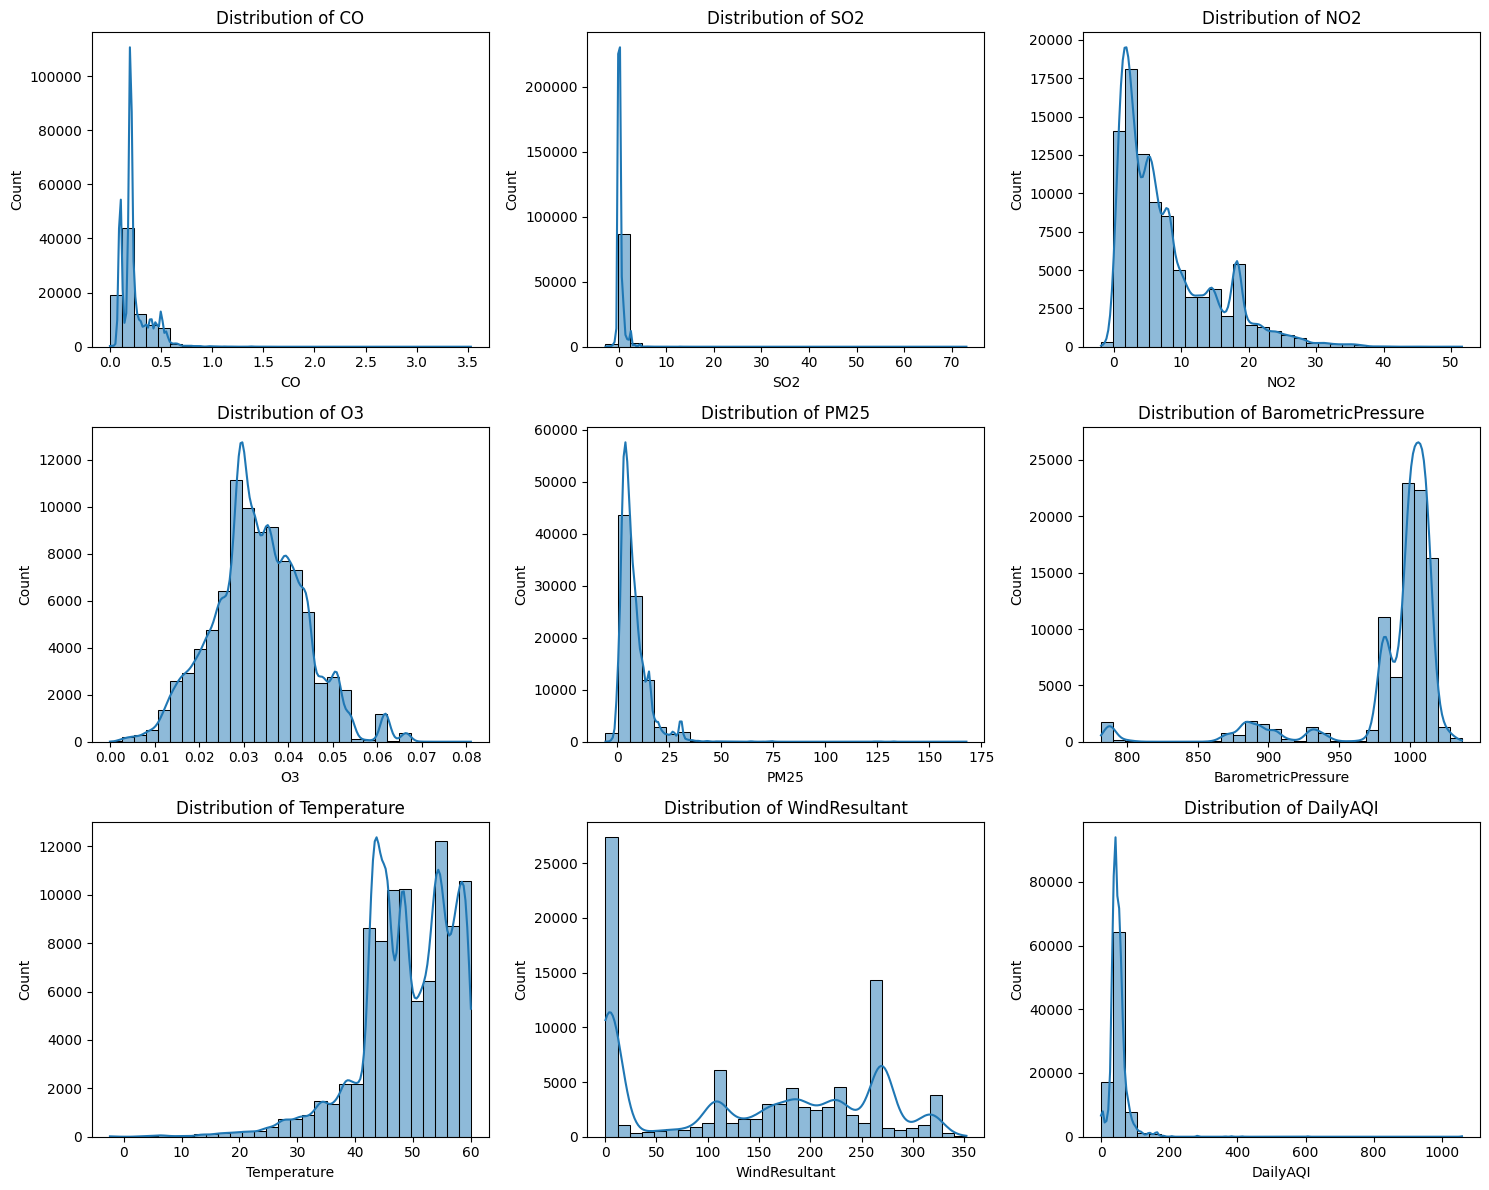

In [9]:
numeric_cols = ['CO', 'SO2', 'NO2', 'O3', 'PM25',
                'BarometricPressure', 'Temperature', 'WindResultant', 'DailyAQI']

plt.figure(figsize=(15, 12))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

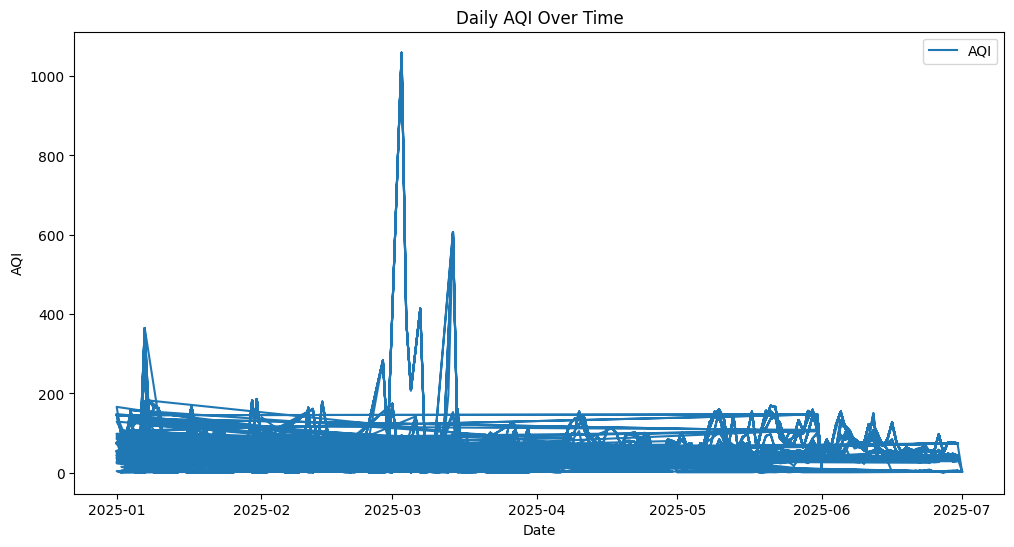

In [ ]:
# Time Series Plot of Daily AQI
plt.figure(figsize=(12, 6))
plt.plot(df['Date Local'], df['DailyAQI'], label='AQI')
plt.title("Daily AQI Over Time")
plt.xlabel("Date")
plt.ylabel("AQI")
plt.legend()
plt.show()

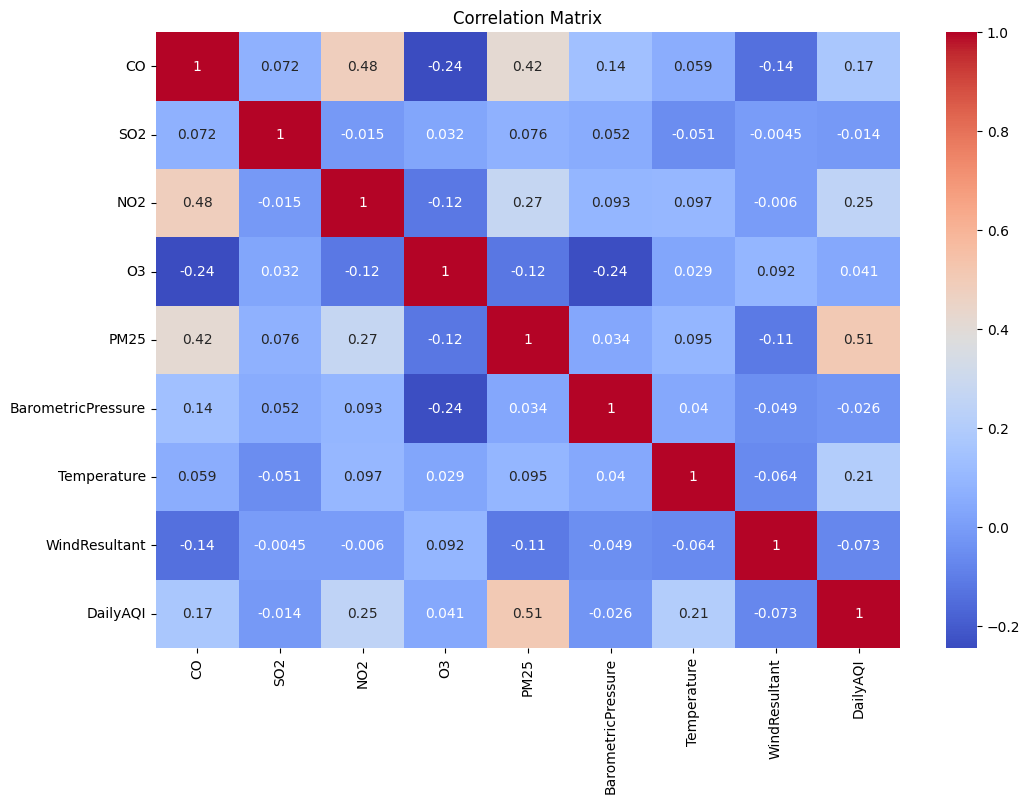

In [ ]:
# Correlation Matrix
plt.figure(figsize=(12, 8))
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

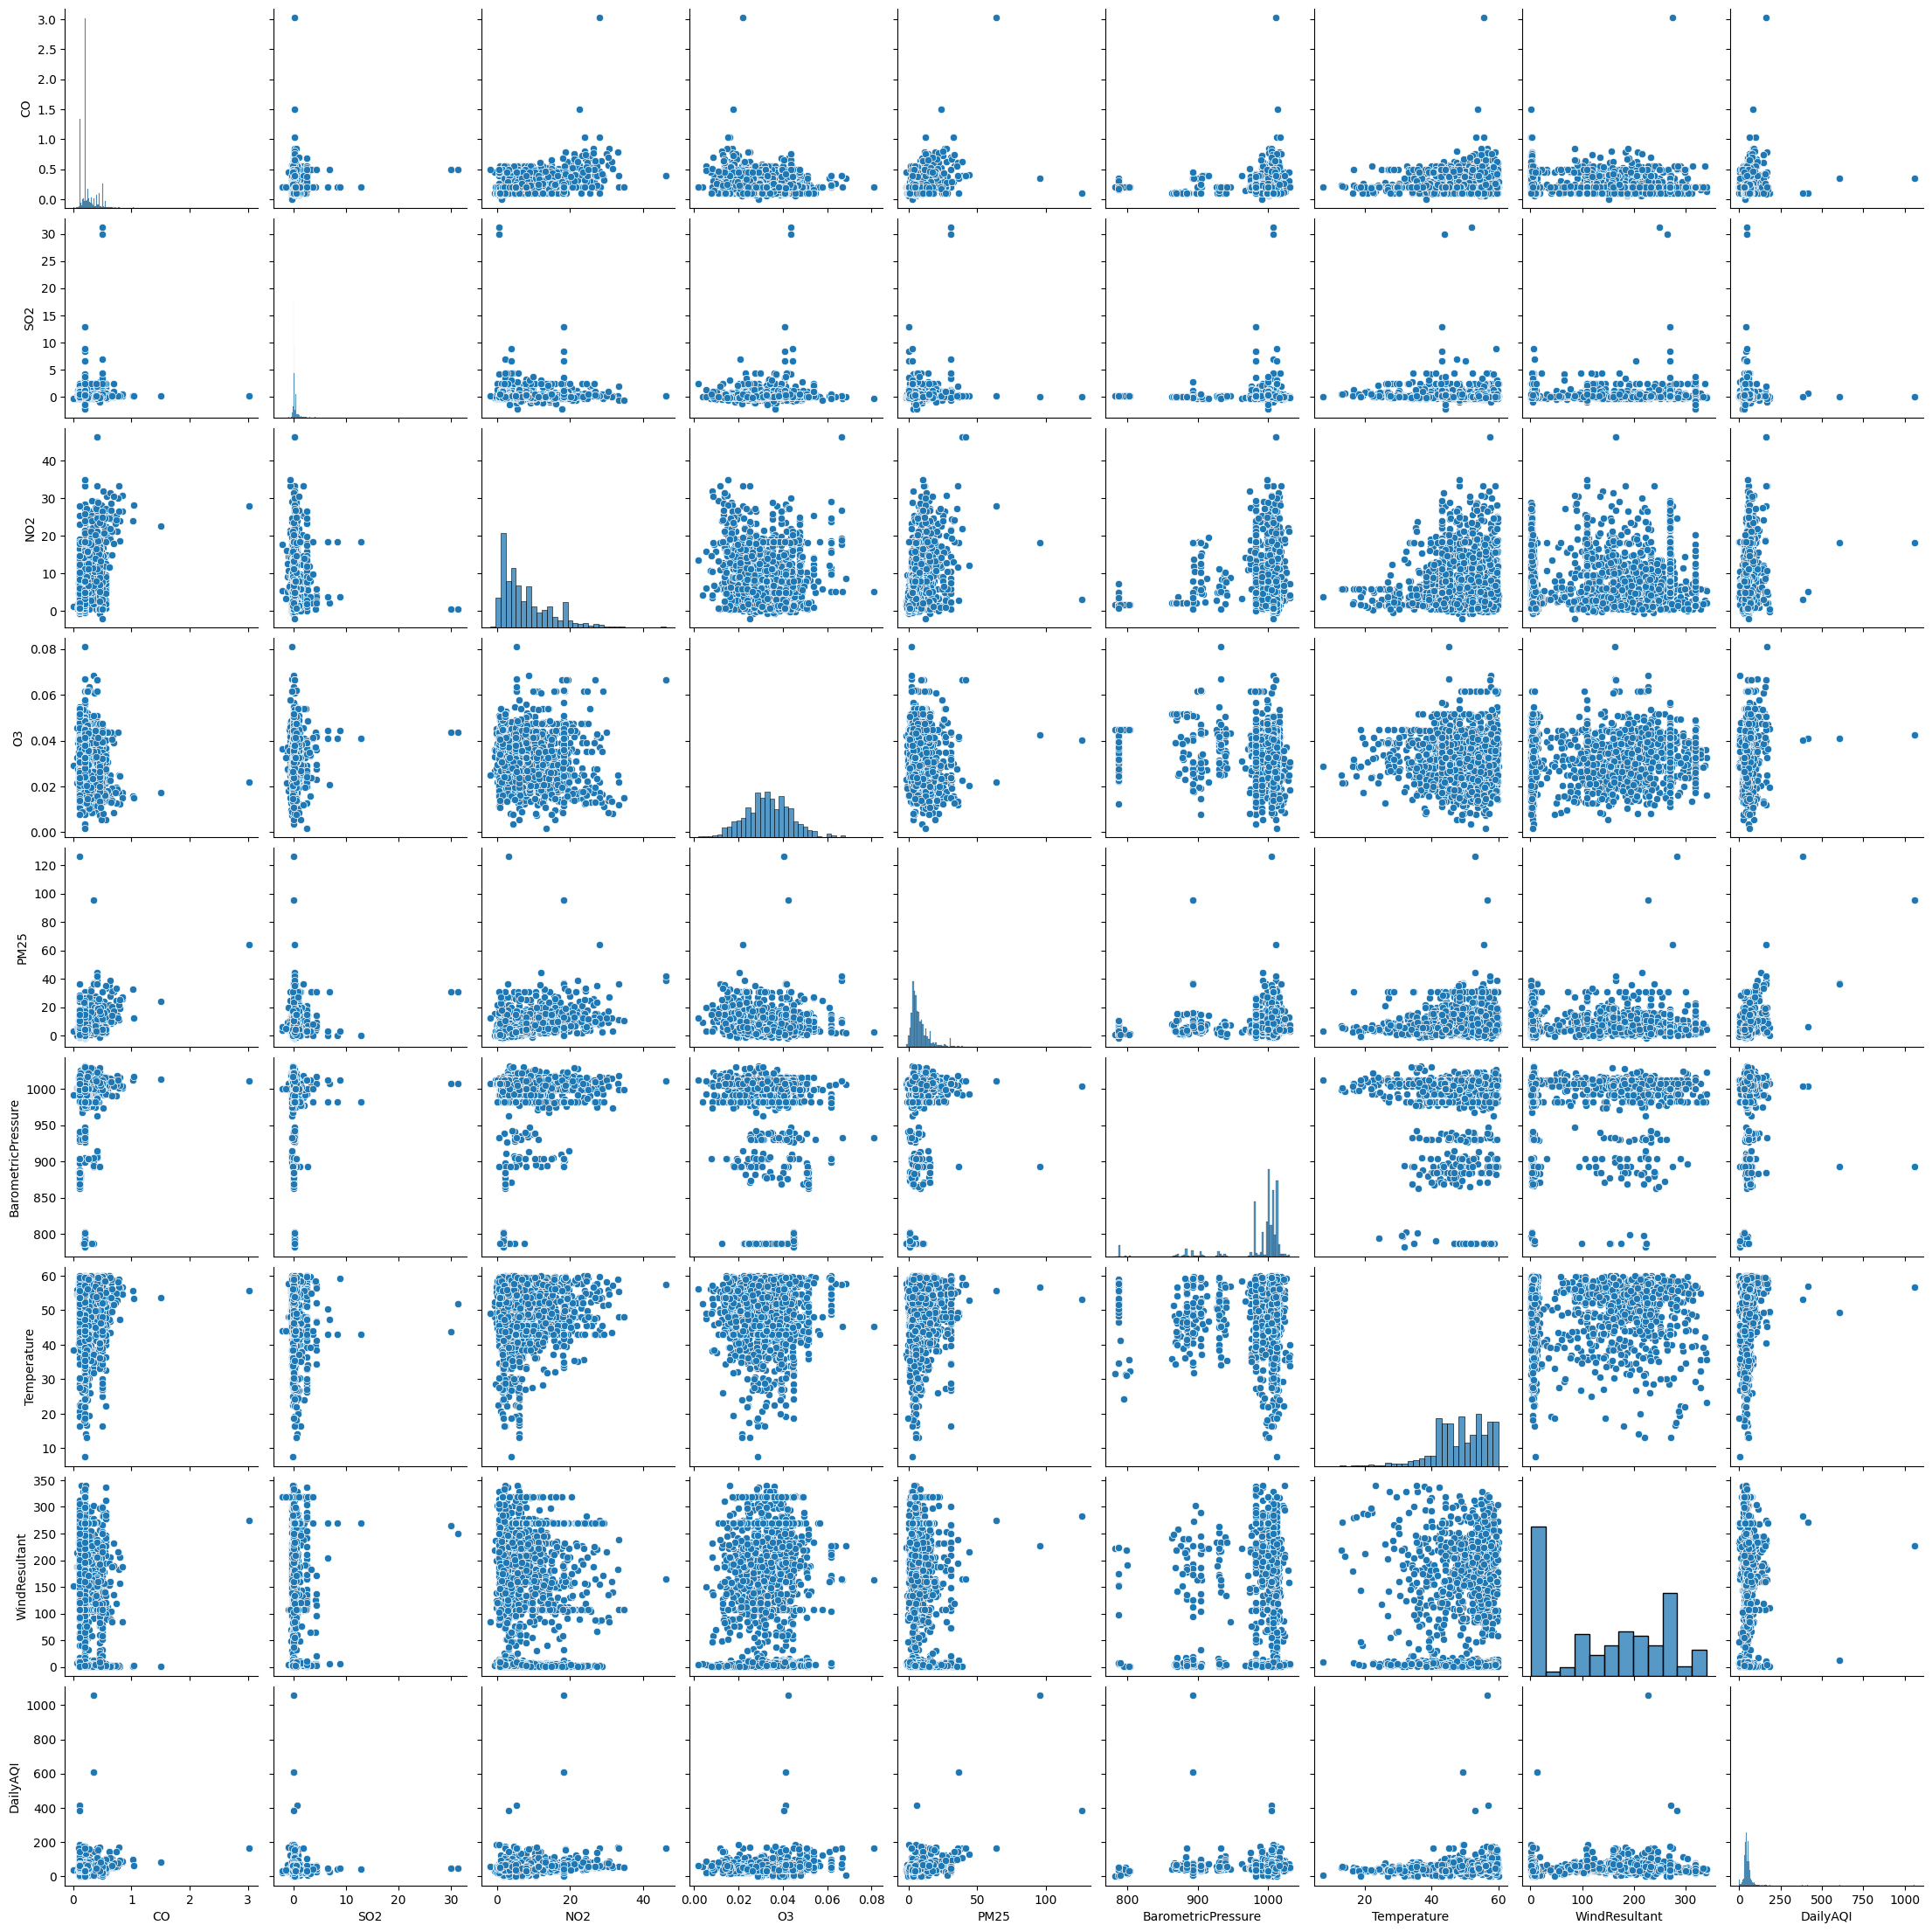

In [ ]:
# Pairplot for numeric features
sns.pairplot(df[numeric_cols].sample(2000))
plt.show()

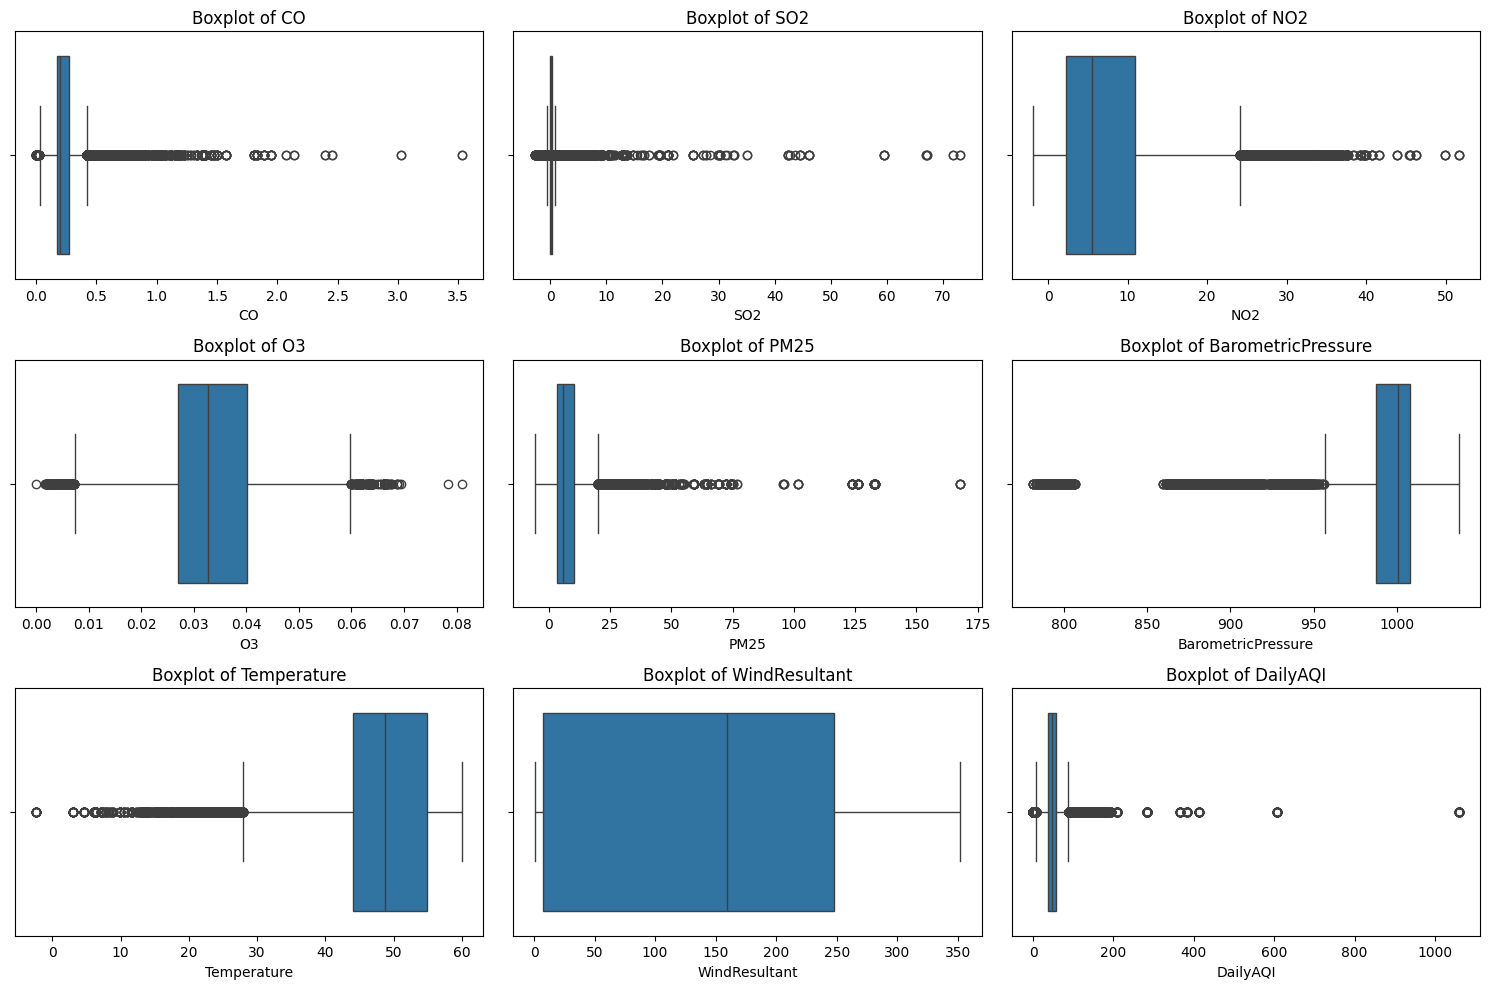

In [ ]:
# Boxplots for outlier detection
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

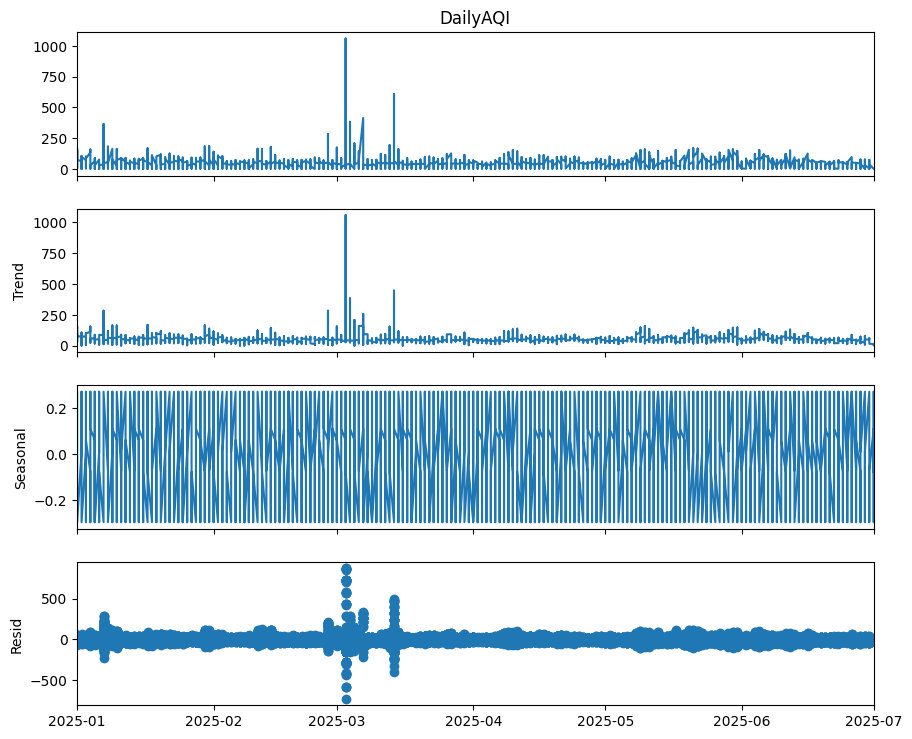

In [ ]:
# Time Series Decomposition of Daily AQI
df = df.set_index('Date Local').sort_index()
decomposition = seasonal_decompose(df['DailyAQI'], model='additive', period=7)
fig = decomposition.plot()
fig.set_size_inches(10, 8)
plt.show()

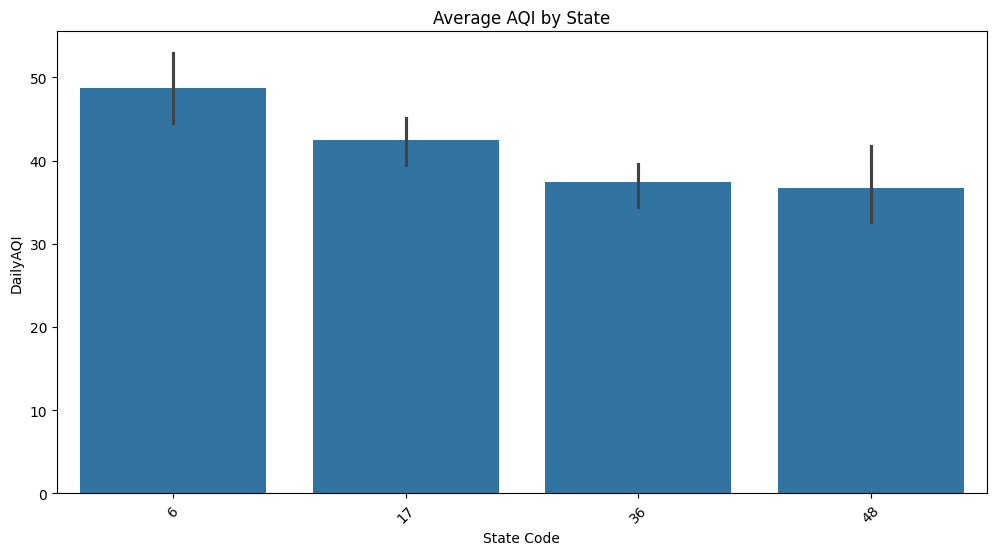

In [ ]:
# Average AQI by State and County
grouped = df.groupby(['State Code', 'County Code'])['DailyAQI'].mean().reset_index()
grouped.head()

plt.figure(figsize=(12, 6))
sns.barplot(data=grouped, x='State Code', y='DailyAQI', estimator=np.mean)
plt.title("Average AQI by State")
plt.xticks(rotation=45)
plt.show()

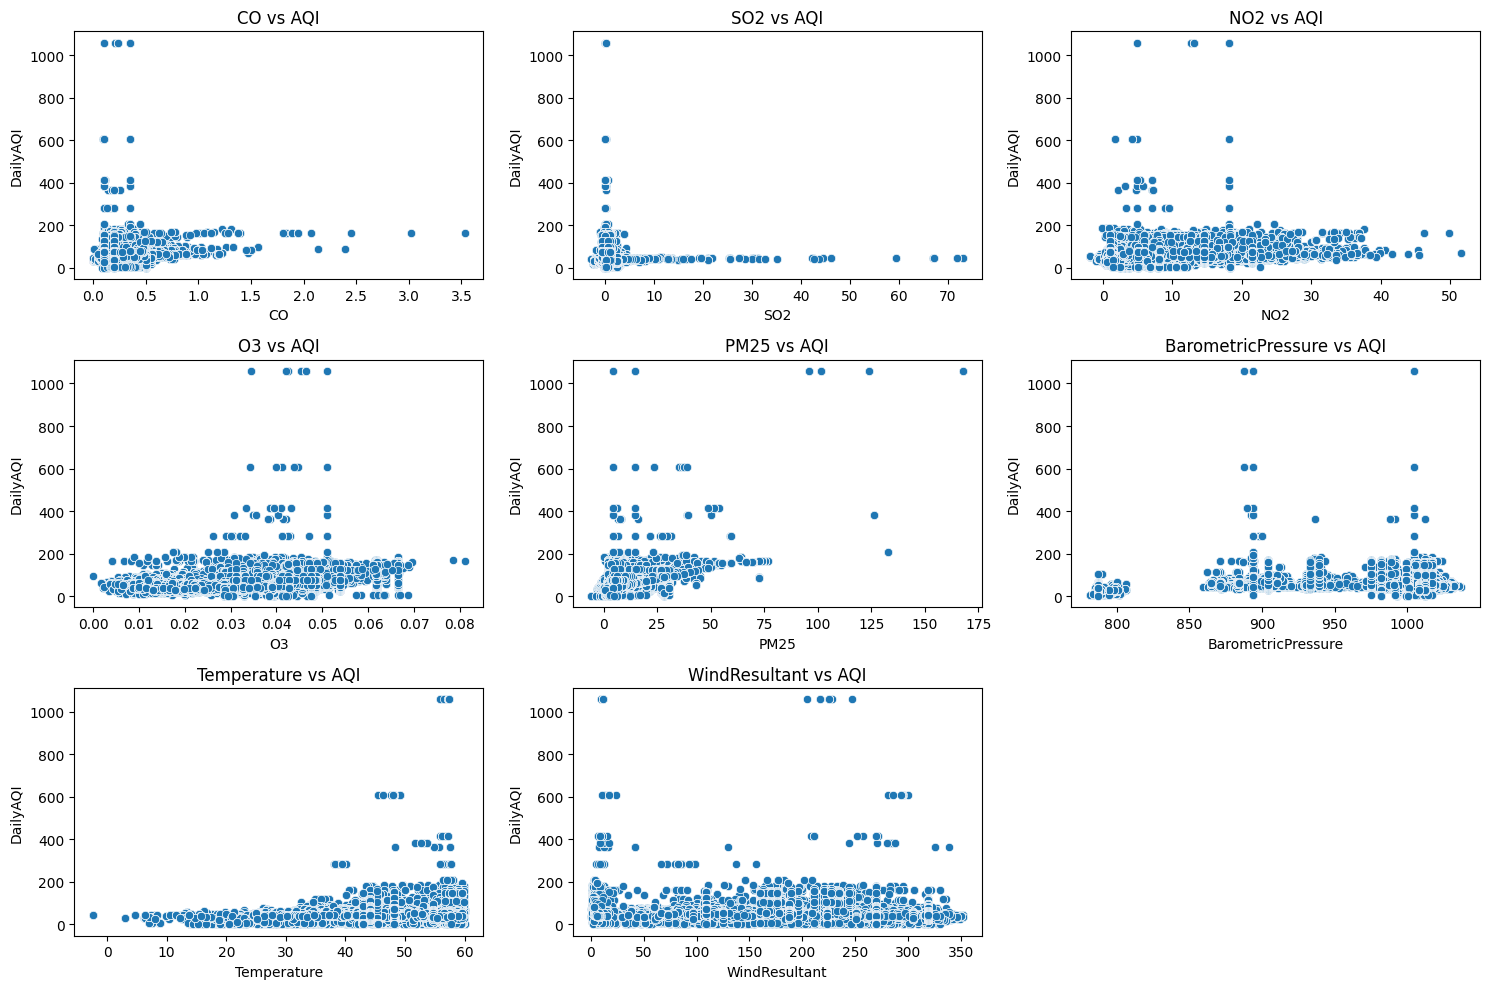

In [17]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols[:-1], 1):
    plt.subplot(3, 3, i)
    sns.scatterplot(x=df[col], y=df['DailyAQI'])
    plt.title(f'{col} vs AQI')
plt.tight_layout()
plt.show()

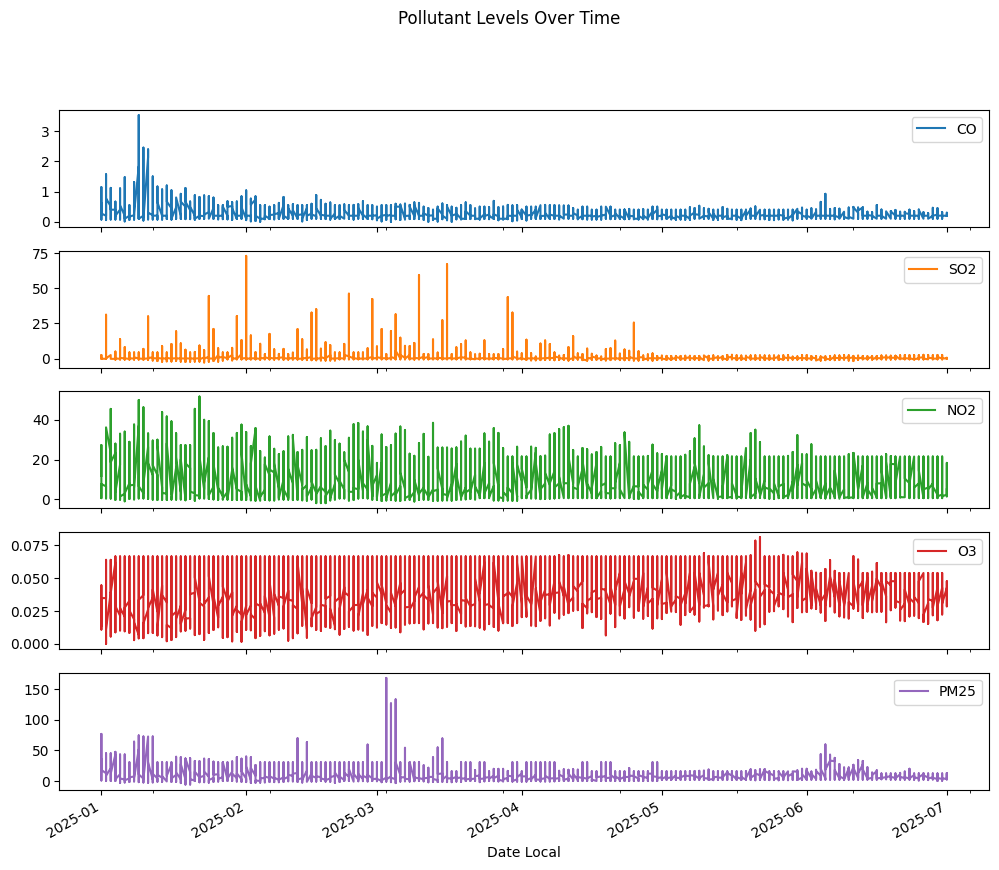

In [19]:
poll_cols = ['CO', 'SO2', 'NO2', 'O3', 'PM25']

df[poll_cols].plot(
    subplots=True, figsize=(12, 10), sharex=True
)

plt.suptitle("Pollutant Levels Over Time")
plt.show()
